<a href="https://colab.research.google.com/github/PrathamUdayG/Machine_Learning_Algorithms_Project/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Nearest-Neighbour

In [61]:
import pandas as pd
import numpy as np

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
df = pd.read_csv('/content/dataset (1).csv')
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [65]:
df.shape

(4920, 18)

In [66]:
df.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,348
Symptom_5,1206
Symptom_6,1986
Symptom_7,2652
Symptom_8,2976
Symptom_9,3228


In [67]:
# To check percentage of null values
df.isnull().sum()/len(df)*100

,0
Disease,0.000000
Symptom_1,0.000000
Symptom_2,0.000000
Symptom_3,0.000000
Symptom_4,7.073171
Symptom_5,24.512195
Symptom_6,40.365854
Symptom_7,53.902439
Symptom_8,60.487805
Symptom_9,65.609756


In [68]:
drop_list = ['Symptom_17','Symptom_16','Symptom_15','Symptom_14','Symptom_13','Symptom_12','Symptom_11']

In [69]:
df.drop(drop_list,axis=1,inplace=True)

In [70]:
df.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,348
Symptom_5,1206
Symptom_6,1986
Symptom_7,2652
Symptom_8,2976
Symptom_9,3228


In [71]:
pd.DataFrame(
    {
        "Features" :df.columns,
        "Unique_values":df.nunique()
    }
)

,Features,Unique_values
Disease,Disease,41
Symptom_1,Symptom_1,34
Symptom_2,Symptom_2,48
Symptom_3,Symptom_3,54
Symptom_4,Symptom_4,50
Symptom_5,Symptom_5,38
Symptom_6,Symptom_6,32
Symptom_7,Symptom_7,26
Symptom_8,Symptom_8,21
Symptom_9,Symptom_9,22


In [72]:
df.fillna("None", inplace=True)

In [73]:
X = df.drop(columns = 'Disease')
y = df['Disease']

In [74]:
y.value_counts()

,count
Disease,
Fungal infection,120
Allergy,120
GERD,120
Chronic cholestasis,120
Drug Reaction,120
Peptic ulcer diseae,120
AIDS,120
Diabetes,120
Gastroenteritis,120


In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [76]:
for col in X.columns:
  X_encoded[col] = le.fit_transform(X[col])

In [77]:
y_encoded = le.fit_transform(y)

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X_encoded)

In [79]:
X_final = X_encoded
y_final = y_encoded

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,

    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

scores = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

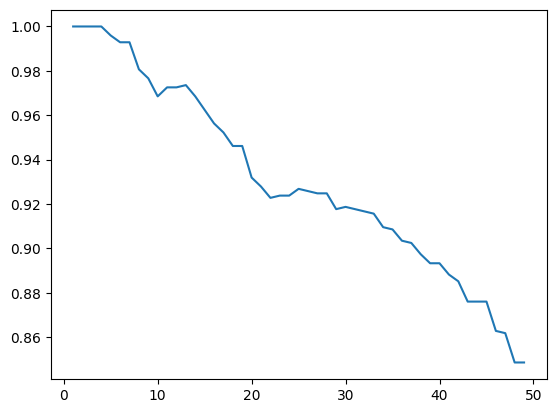

In [85]:
import matplotlib.pyplot as plt
plt.plot(range(1,50),scores)

In [86]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred

array([23, 14,  6, 24,  0, 15, 10, 19, 34,  1,  2,  6, 26, 25, 34, 17, 30,
       12, 40, 15, 21,  1, 13,  1, 36, 33, 10, 37, 26, 20, 28, 31, 33,  7,
       26, 18,  5,  7, 20,  6,  4, 16, 27, 36, 39, 38, 40, 22, 27, 32, 39,
       23,  4, 30,  8, 32, 17, 17, 38, 18, 19,  0, 26, 17, 20, 10,  5, 34,
       40, 25,  5, 39, 25, 16, 32, 27,  7, 30, 33, 17, 35, 25, 25,  4, 19,
        0, 30,  6,  0, 37, 37, 36, 11,  2, 22, 27, 12, 28, 14, 26, 28,  0,
       20,  8, 26,  4,  8, 24, 15, 28, 30, 34, 24, 16, 26,  1, 26, 38, 17,
        4, 31, 23, 22, 10, 21,  5, 27,  2, 15, 39,  5, 29, 10, 36, 30, 22,
        5, 18, 27, 18,  1, 39, 10,  5, 25, 16, 10, 24, 37, 38, 13,  8, 14,
        1, 12, 30, 27, 39,  0, 20, 31, 32, 16, 18, 20, 26, 37, 29, 22, 39,
       23, 23, 11, 30, 17, 35,  4, 10, 34,  3, 24, 10, 15,  4, 11, 16, 14,
       35, 11, 37,  0, 37, 38, 33,  7,  3, 36, 31,  8, 26,  0, 19, 40,  0,
       21, 39, 31, 22,  6, 12, 21,  4, 39, 24, 26, 28,  9, 22,  4, 26,  4,
       36, 29,  6, 12, 32

In [87]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [88]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8485772357723578

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.92      0.80        24
           1       0.75      0.88      0.81        24
           2       0.62      0.62      0.62        24
           3       1.00      0.71      0.83        24
           4       0.81      0.92      0.86        24
           5       0.71      1.00      0.83        24
           6       0.84      0.88      0.86        24
           7       0.87      0.83      0.85        24
           8       0.83      1.00      0.91        24
           9       0.88      0.96      0.92        24
          10       0.77      1.00      0.87        24
          11       0.74      0.96      0.84        24
          12       0.95      0.88      0.91        24
          13       1.00      0.75      0.86        24
          14       1.00      0.71      0.83        24
          15       0.79      0.92      0.85        24
          16       0.81    

In [89]:
# predictions
train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

# accuracy
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Train Accuracy :", train_acc)
print("Test Accuracy  :", test_acc)

Train Accuracy : 0.9804369918699187
Test Accuracy  : 0.9684959349593496
